# Polls and Deliberation

In [26]:
# import the Profile class
from voting.profiles import Profile
from voting.generate_profiles import *
from voting.voting_methods import *
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import pickle
import random
import numpy as np
from itertools import combinations, permutations

from tqdm.notebook import tqdm

## Swap Distance

The swap distance between $P$ and $P'$ is 

$$d_{KS}(P, P') = |\{\{a,b\} \mid a\mathrel{P} b\mbox{ and } b\mathrel{P}'a\}$$

This is also called the **Kendall tau distance**.  

In [27]:

def kendalltau_dist(rank_a, rank_b):
    tau = 0
    n_candidates = len(rank_a)
    print(f"rank_a = {rank_a}")
    print(f"rank_b = {rank_b}")
    for i, j in combinations(range(n_candidates), 2):
        print(f"i={i}, j={j}")
        print(f"np.sign(rank_a[i] - rank_a[j]) = {np.sign(rank_a[i] - rank_a[j])}")
        print(f"np.sign(rank_b[i] - rank_b[j]) = {np.sign(rank_b[i] - rank_b[j])}")
        tau += (np.sign(rank_a[i] - rank_a[j]) ==
                -np.sign(rank_b[i] - rank_b[j]))
        print(tau)
    return tau


In [28]:

r1 = [1, 2, 3, 4]
r2 = [4, 3, 2, 1]
print(kendalltau_dist(r1, r2))

rank_a = [1, 2, 3, 4]
rank_b = [4, 3, 2, 1]
i=0, j=1
np.sign(rank_a[i] - rank_a[j]) = -1
np.sign(rank_b[i] - rank_b[j]) = 1
1
i=0, j=2
np.sign(rank_a[i] - rank_a[j]) = -1
np.sign(rank_b[i] - rank_b[j]) = 1
2
i=0, j=3
np.sign(rank_a[i] - rank_a[j]) = -1
np.sign(rank_b[i] - rank_b[j]) = 1
3
i=1, j=2
np.sign(rank_a[i] - rank_a[j]) = -1
np.sign(rank_b[i] - rank_b[j]) = 1
4
i=1, j=3
np.sign(rank_a[i] - rank_a[j]) = -1
np.sign(rank_b[i] - rank_b[j]) = 1
5
i=2, j=3
np.sign(rank_a[i] - rank_a[j]) = -1
np.sign(rank_b[i] - rank_b[j]) = 1
6
6


In [29]:
## Kemmeny-Young Method 

num_cands = 4
num_voters = 5

prof = generate_profile(num_cands, num_voters)

print(prof.rankings)
prof.display()

def kendalltau_dist(rank_a, rank_b):
    tau = 0
    n_candidates = len(rank_a)
    for i, j in combinations(range(n_candidates), 2):
        tau += (np.sign(rank_a[i] - rank_a[j]) ==
                -np.sign(rank_b[i] - rank_b[j]))
    return tau


rankings_dist = dict()
for ranking in permutations(range(num_cands)): 
    rankings_dist[tuple(ranking)] = sum(kendalltau_dist(r, ranking) for r in prof.rankings)

min_dist = min(rankings_dist.values())

group_rankings = [r for r in rankings_dist.keys() if rankings_dist[r] == min_dist]

print(f"The group rankings are {group_rankings} at a distance of {min_dist}")

[(2, 3, 0, 1), (2, 3, 0, 1), (2, 1, 0, 3), (2, 3, 1, 0), (2, 0, 3, 1)]
+---+---+---+---+
| 2 | 1 | 1 | 1 |
+---+---+---+---+
| 2 | 2 | 2 | 2 |
| 3 | 1 | 3 | 0 |
| 0 | 0 | 1 | 3 |
| 1 | 3 | 0 | 1 |
+---+---+---+---+
The group rankings are [(2, 3, 0, 1)] at a distance of 9


In [30]:
true_rank = (0,1,2,3)
distances = dict()
for r in permutations(range(len(true_rank))): 
    distances[r] = kendalltau_dist(true_rank, r)

sorted_tuples = sorted(distances.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
max_dist = max(sorted_dict.values())
for r in sorted_dict.keys():
    print(f"dist between {true_rank} and {r} is {sorted_dict[r] / max_dist}")

dist between (0, 1, 2, 3) and (0, 1, 2, 3) is 0.0
dist between (0, 1, 2, 3) and (0, 1, 3, 2) is 0.16666666666666666
dist between (0, 1, 2, 3) and (0, 2, 1, 3) is 0.16666666666666666
dist between (0, 1, 2, 3) and (1, 0, 2, 3) is 0.16666666666666666
dist between (0, 1, 2, 3) and (0, 2, 3, 1) is 0.3333333333333333
dist between (0, 1, 2, 3) and (0, 3, 1, 2) is 0.3333333333333333
dist between (0, 1, 2, 3) and (1, 0, 3, 2) is 0.3333333333333333
dist between (0, 1, 2, 3) and (1, 2, 0, 3) is 0.3333333333333333
dist between (0, 1, 2, 3) and (2, 0, 1, 3) is 0.3333333333333333
dist between (0, 1, 2, 3) and (0, 3, 2, 1) is 0.5
dist between (0, 1, 2, 3) and (1, 2, 3, 0) is 0.5
dist between (0, 1, 2, 3) and (1, 3, 0, 2) is 0.5
dist between (0, 1, 2, 3) and (2, 0, 3, 1) is 0.5
dist between (0, 1, 2, 3) and (2, 1, 0, 3) is 0.5
dist between (0, 1, 2, 3) and (3, 0, 1, 2) is 0.5
dist between (0, 1, 2, 3) and (1, 3, 2, 0) is 0.6666666666666666
dist between (0, 1, 2, 3) and (2, 1, 3, 0) is 0.66666666666666

In [31]:
from scipy.stats import kendalltau

true_rank = (0,1,2,3)
distances = dict()
for r in permutations(range(len(true_rank))): 
    distances[r],_ = kendalltau(true_rank, r)

sorted_tuples = sorted(distances.items(), key=lambda item: item[1], reverse=True)
sorted_dict = {k: v for k, v in sorted_tuples}
max_dist = max(sorted_dict.values())
for r in sorted_dict.keys():
    print(f"dist between {true_rank} and {r} is {sorted_dict[r]}")

dist between (0, 1, 2, 3) and (0, 1, 2, 3) is 1.0
dist between (0, 1, 2, 3) and (0, 1, 3, 2) is 0.6666666666666669
dist between (0, 1, 2, 3) and (0, 2, 1, 3) is 0.6666666666666669
dist between (0, 1, 2, 3) and (1, 0, 2, 3) is 0.6666666666666669
dist between (0, 1, 2, 3) and (0, 2, 3, 1) is 0.3333333333333334
dist between (0, 1, 2, 3) and (0, 3, 1, 2) is 0.3333333333333334
dist between (0, 1, 2, 3) and (1, 0, 3, 2) is 0.3333333333333334
dist between (0, 1, 2, 3) and (1, 2, 0, 3) is 0.3333333333333334
dist between (0, 1, 2, 3) and (2, 0, 1, 3) is 0.3333333333333334
dist between (0, 1, 2, 3) and (0, 3, 2, 1) is 0.0
dist between (0, 1, 2, 3) and (1, 2, 3, 0) is 0.0
dist between (0, 1, 2, 3) and (1, 3, 0, 2) is 0.0
dist between (0, 1, 2, 3) and (2, 0, 3, 1) is 0.0
dist between (0, 1, 2, 3) and (2, 1, 0, 3) is 0.0
dist between (0, 1, 2, 3) and (3, 0, 1, 2) is 0.0
dist between (0, 1, 2, 3) and (1, 3, 2, 0) is -0.3333333333333334
dist between (0, 1, 2, 3) and (2, 1, 3, 0) is -0.333333333333333

In [8]:


def cs_dist(rank_a, rank_b): 
    
    alts = sorted(rank_a)
    d = 0
    for c in alts: 
        d += math.fabs(rank_a.index(c) - rank_b.index(c))
    return d

r1 = [0,1,2,3]
r2 = [3, 2, 1, 0]
print(f"CS distance between {r1} and {r2} is ", cs_dist(r1, r2))

CS distance between [0, 1, 2, 3] and [3, 2, 1, 0] is  8.0


In [9]:
true_rank = (0,1,2,3)
distances = dict()
for r in permutations(range(len(true_rank))): 
    distances[r] = cs_dist(true_rank, r)

sorted_tuples = sorted(distances.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
max_dist = max(sorted_dict.values())
for r in sorted_dict.keys():
    print(f"dist between {true_rank} and {r} is {sorted_dict[r] / max_dist}")

dist between (0, 1, 2, 3) and (0, 1, 2, 3) is 0.0
dist between (0, 1, 2, 3) and (0, 1, 3, 2) is 0.25
dist between (0, 1, 2, 3) and (0, 2, 1, 3) is 0.25
dist between (0, 1, 2, 3) and (1, 0, 2, 3) is 0.25
dist between (0, 1, 2, 3) and (0, 2, 3, 1) is 0.5
dist between (0, 1, 2, 3) and (0, 3, 1, 2) is 0.5
dist between (0, 1, 2, 3) and (0, 3, 2, 1) is 0.5
dist between (0, 1, 2, 3) and (1, 0, 3, 2) is 0.5
dist between (0, 1, 2, 3) and (1, 2, 0, 3) is 0.5
dist between (0, 1, 2, 3) and (2, 0, 1, 3) is 0.5
dist between (0, 1, 2, 3) and (2, 1, 0, 3) is 0.5
dist between (0, 1, 2, 3) and (1, 2, 3, 0) is 0.75
dist between (0, 1, 2, 3) and (1, 3, 0, 2) is 0.75
dist between (0, 1, 2, 3) and (1, 3, 2, 0) is 0.75
dist between (0, 1, 2, 3) and (2, 0, 3, 1) is 0.75
dist between (0, 1, 2, 3) and (2, 1, 3, 0) is 0.75
dist between (0, 1, 2, 3) and (3, 0, 1, 2) is 0.75
dist between (0, 1, 2, 3) and (3, 0, 2, 1) is 0.75
dist between (0, 1, 2, 3) and (3, 1, 0, 2) is 0.75
dist between (0, 1, 2, 3) and (3, 1, 2,

### Weak Rankings

In [32]:

class wRanking(object):
    
    def __init__(self, cmap, ranks = None, r_str = None): 

        self._cand_to_cnum = cmap
        self._cnum_to_cand = {cnum: c for c, cnum in cmap.items()} 
        self._ranks = ranks  
        self._r_str = r_str 
        if self._ranks is None: 
            self.set_rank_list_from_str(r_str, cmap)
        if self._r_str is None: 
            self.set_rank_str_from_rank_list(ranks, self._cnum_to_cand)
    @property
    def rank_list(self): 
        return self._ranks
    
    @property
    def rank_dict(self): 
        return {self._cnum_to_cand[cnum]:  self._ranks[cnum] for cnum in range(len(self._ranks))}
        
    @property
    def alts(self): 
        return sorted(self._cand_to_cnum.keys())
    
    @property
    def num_alts(self): 
        return len(self._cand_to_cnum.keys())
        
    @property
    def max_rank(self): 
        return self.num_alts
    
    def rank(self, c):
        
        return self._ranks[self._cand_to_cnum[c]]
    
    def cands_at_rank(self, rank): 
        
        return [self._cnum_to_cand[cnum] for cnum,r in enumerate(self._ranks) if r == rank]
    
    def R(self, c1, c2): 
        
        c1_rank = self.rank(c1)
        c2_rank = self.rank(c2)
        return (c2_rank is None) or (c1_rank is not None and (c1_rank <= c2_rank))
                
    def P(self, c1, c2): 
        
        c1_rank = self.rank(c1)
        c2_rank = self.rank(c2)
        return (c2_rank is None and c1_rank is not None) or (c1_rank is not None and (c1_rank < c2_rank))
    
    def I(self, c1, c2): 
        
        return self.rank(c1) == self.rank(c2)
    
    def lift(self, cand, rank):
        """assumes that the ballot is complete and the only cands with no rank are at the bottom of the ranking"""
        c_rank =  self._ranks[self._cand_to_cnum[cand]]
        for _c in self._cand_to_cnum.keys():
            if self._ranks[self._cand_to_cnum[_c]] is not None and self._ranks[self._cand_to_cnum[_c]] <= c_rank:
                self._ranks[self._cand_to_cnum[_c]] += 1
        self._ranks[self._cand_to_cnum[cand]] = rank
        self.set_rank_str_from_rank_list(self._ranks, self._cnum_to_cand)        
        
    def judgement_set(self): 
        j_set = dict()
        for c in self.alts: 
            for d in self.alts:
                if c != d: 
                    if self.P(c,d): 
                        j_set[(c,d)] = True
                        j_set[(d,c)] = False
                    elif self.P(d,c): 
                        j_set[(c,d)] = False
                        j_set[(d,c)] = True  
                    elif self.I(c,d): 
                        j_set[(c,d)] = True
                        j_set[(d,c)] = True
        return j_set
        
    def set_rank_list_from_str(self, r_str, cmap):
        
        cname_type = type(list(cmap.keys())[0])
        bits = r_str.strip().split(",")
        ranks = [None] * len(cmap.keys())
        pos  = 0
        rank = 1
        partial = False
        while pos < len(bits): 
            if bits[pos].find("{") != -1:
                partial = True
                ranks[cmap[cname_type(bits[pos].replace("{",""))]] = rank
                pos += 1
            elif bits[pos].find("}") != -1:
                ranks[cmap[cname_type(bits[pos].replace("}",""))]] = rank
                rank += 1
                partial = False
                pos += 1
            else: 
                ranks[cmap[cname_type(bits[pos])]] = rank
                if not partial: 
                    rank += 1
                pos += 1    
        self._ranks = ranks
        
    
    def set_rank_str_from_rank_list(self, r_list, cnum_to_cand):
        
        r_str = ''
        for r in range(1,len(cnum_to_cand.keys()) + 1): 
            cs_at_rank = [str(cnum_to_cand[c]) for c,cr in enumerate(r_list) if cr == r]
            if len(cs_at_rank) == 1: 
                r_str += f"{cs_at_rank[0]},"
            elif len(cs_at_rank) > 1: 
                r_str  += "{" + ",".join(cs_at_rank) + "},"
        self._r_str = r_str[0:-1] # remove last ,

    def __str__(self): 
        return self._r_str

num_cands = 7
r_str = "1,{2,5},{4,0},6"
cmap = {c: c for c in range(num_cands)}
print("cmap", cmap)

print("\n")
r = wRanking(cmap, r_str = r_str)

print(r.rank_list)
print(r.rank_dict)
print(r)
print("-----")
print("R(1,2)", r.R(1,2))
print("R(2,1)", r.R(2,1))
print("P(1,2)", r.P(1,2))
print("P(2,1)", r.R(2,1))
print("I(1,2)", r.I(1,2))
print("I(2,1)", r.I(2,1))
print("-")
print("R(2,5)", r.R(2,5))
print("R(5,2)", r.R(5,2))
print("P(2,5)", r.P(2,5))
print("P(5,2)", r.P(5,2))
print("I(2,5)", r.I(2,5))
print("I(5,2)", r.I(5,2))
print("-")
print("R(0,3)", r.R(0,3))
print("R(3,0)", r.R(3,0))
print("R(3,3)", r.R(3,3))
print("P(0,3)", r.P(0,3))
print("P(3,0)", r.P(3,0))
print("P(3,3)", r.P(3,3))
print("I(0,3)", r.I(0,3))
print("I(3,0)", r.I(3,0))
print("I(3,3)", r.I(3,3))

print(r.judgement_set())

r2 = wRanking(cmap, r_str = "0,1,2,3")
print(r2)
r2.lift(2, 1)
print(r2)

cmap {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


[3, 1, 2, None, 3, 2, 4]
{0: 3, 1: 1, 2: 2, 3: None, 4: 3, 5: 2, 6: 4}
1,{2,5},{4,0},6
-----
R(1,2) True
R(2,1) False
P(1,2) True
P(2,1) False
I(1,2) False
I(2,1) False
-
R(2,5) True
R(5,2) True
P(2,5) False
P(5,2) False
I(2,5) True
I(5,2) True
-
R(0,3) True
R(3,0) False
R(3,3) True
P(0,3) True
P(3,0) False
P(3,3) False
I(0,3) False
I(3,0) False
I(3,3) True
{(0, 1): False, (1, 0): True, (0, 2): False, (2, 0): True, (0, 3): True, (3, 0): False, (0, 4): True, (4, 0): True, (0, 5): False, (5, 0): True, (0, 6): True, (6, 0): False, (1, 2): True, (2, 1): False, (1, 3): True, (3, 1): False, (1, 4): True, (4, 1): False, (1, 5): True, (5, 1): False, (1, 6): True, (6, 1): False, (2, 3): True, (3, 2): False, (2, 4): True, (4, 2): False, (2, 5): True, (5, 2): True, (2, 6): True, (6, 2): False, (3, 4): False, (4, 3): True, (3, 5): False, (5, 3): True, (3, 6): False, (6, 3): True, (4, 5): False, (5, 4): True, (4, 6): True, (6, 4): False, (5, 6): Tru

## Modified KS Ranking

In [33]:
def _ks_dist(c1, c2, wr1, wr2): 
    
    dist = 0
    if wr1.P(c2, c1) and wr2.P(c1, c2): 
        dist = 2
    elif wr1.P(c2, c1) and wr2.I(c1, c2):
        dist = 1
    elif wr1.I(c2, c1) and wr2.P(c1, c2):
        dist = 1
    return dist

def ks_dist(wr1, wr2): 
    
    assert wr1.alts == wr2.alts, "Rankings must be based on the same set of alternatives"
    dist = 0
    for c in wr1.alts: 
        for d in wr1.alts: 
            dist += _ks_dist(c, d, wr1, wr2)
            
    return dist

num_cands = 4
cmap = {c:c for c in range(num_cands)}      
r1 = wRanking(cmap, r_str="0,1,2,3")
r2 = wRanking(cmap, r_str="1,0,2,3")

print(ks_dist(r1,r2))

    

2


In [34]:
true_ranking = (1,2,3,4)
nu = 1.0
theta = 0.0

num_cands = 4
cmap = {c+1:c for c in range(num_cands)}  
true_rank = wRanking(cmap, r_str=",".join([str(c) for c in true_ranking]))
distances = dict()
for perm in permutations(range(len(true_rank.alts))): 
    r = wRanking(cmap, r_str=",".join([str(c+1) for c in perm]))
    distances[r] = ks_dist(true_rank, r)
sorted_tuples = sorted(distances.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
max_dist = max(sorted_dict.values())
print(max_dist)
for r in sorted_dict.keys():
    print(f"dist between {str(true_rank)} and {str(r)} is {round(sorted_dict[r] / max_dist, 4)}")

12
dist between 1,2,3,4 and 1,2,3,4 is 0.0
dist between 1,2,3,4 and 1,2,4,3 is 0.1667
dist between 1,2,3,4 and 1,3,2,4 is 0.1667
dist between 1,2,3,4 and 2,1,3,4 is 0.1667
dist between 1,2,3,4 and 1,3,4,2 is 0.3333
dist between 1,2,3,4 and 1,4,2,3 is 0.3333
dist between 1,2,3,4 and 2,1,4,3 is 0.3333
dist between 1,2,3,4 and 2,3,1,4 is 0.3333
dist between 1,2,3,4 and 3,1,2,4 is 0.3333
dist between 1,2,3,4 and 1,4,3,2 is 0.5
dist between 1,2,3,4 and 2,3,4,1 is 0.5
dist between 1,2,3,4 and 2,4,1,3 is 0.5
dist between 1,2,3,4 and 3,1,4,2 is 0.5
dist between 1,2,3,4 and 3,2,1,4 is 0.5
dist between 1,2,3,4 and 4,1,2,3 is 0.5
dist between 1,2,3,4 and 2,4,3,1 is 0.6667
dist between 1,2,3,4 and 3,2,4,1 is 0.6667
dist between 1,2,3,4 and 3,4,1,2 is 0.6667
dist between 1,2,3,4 and 4,1,3,2 is 0.6667
dist between 1,2,3,4 and 4,2,1,3 is 0.6667
dist between 1,2,3,4 and 3,4,2,1 is 0.8333
dist between 1,2,3,4 and 4,2,3,1 is 0.8333
dist between 1,2,3,4 and 4,3,1,2 is 0.8333
dist between 1,2,3,4 and 4,3,

In [35]:
def modified_ks_dist(wr1, wr2, nu, theta): 
    
    assert wr1.alts == wr2.alts, "Rankings must be based on the same set of alternatives"
    dist = 0
    num_alts = wr1.num_alts
    alts = wr1.alts
    for c in alts: 
        w = ((num_alts - wr1.rank(c)) + 1) ** theta
        #print(w)
        dist += w * ((sum([_ks_dist(c, d, wr1, wr2) for d in alts])) ** nu)
            
    return dist



In [36]:
true_ranking = (1,2,3,4)
nu = 1.0
theta = 0.5

num_cands = 4
cmap = {c+1:c for c in range(num_cands)}  
true_rank = wRanking(cmap, r_str=",".join([str(c) for c in true_ranking]))
distances = dict()
for perm in permutations(range(len(true_rank.alts))): 
    r = wRanking(cmap, r_str=",".join([str(c+1) for c in perm]))
    distances[r] = modified_ks_dist(true_rank, r, nu, theta)
sorted_tuples = sorted(distances.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
max_dist = max(sorted_dict.values())
print(max_dist)
for r in sorted_dict.keys():
    print(f"dist between {str(true_rank)} and {str(r)} is {round(sorted_dict[r] / max_dist, 4)}")

15.120955864630135
dist between 1,2,3,4 and 1,2,3,4 is 0.0
dist between 1,2,3,4 and 1,2,4,3 is 0.1323
dist between 1,2,3,4 and 1,3,2,4 is 0.1871
dist between 1,2,3,4 and 2,1,3,4 is 0.2291
dist between 1,2,3,4 and 1,4,2,3 is 0.2645
dist between 1,2,3,4 and 1,3,4,2 is 0.3193
dist between 1,2,3,4 and 2,1,4,3 is 0.3614
dist between 1,2,3,4 and 3,1,2,4 is 0.3741
dist between 1,2,3,4 and 4,1,2,3 is 0.3968
dist between 1,2,3,4 and 2,3,1,4 is 0.4161
dist between 1,2,3,4 and 1,4,3,2 is 0.4516
dist between 1,2,3,4 and 2,4,1,3 is 0.4936
dist between 1,2,3,4 and 3,1,4,2 is 0.5064
dist between 1,2,3,4 and 2,3,4,1 is 0.5484
dist between 1,2,3,4 and 4,1,3,2 is 0.5839
dist between 1,2,3,4 and 3,2,1,4 is 0.6032
dist between 1,2,3,4 and 4,2,1,3 is 0.6259
dist between 1,2,3,4 and 3,4,1,2 is 0.6386
dist between 1,2,3,4 and 2,4,3,1 is 0.6807
dist between 1,2,3,4 and 3,2,4,1 is 0.7355
dist between 1,2,3,4 and 4,3,1,2 is 0.7709
dist between 1,2,3,4 and 4,2,3,1 is 0.8129
dist between 1,2,3,4 and 3,4,2,1 is 0.

## Duddy-Piggins Ordering

In [37]:


def between(wr1, wr2, wr3): 
    '''return True if wr2 is between wr1 and wr3'''
    is_between = True
    wr1_js = wr1.judgement_set()
    wr2_js = wr2.judgement_set()
    wr3_js = wr3.judgement_set()
    for c in wr1.alts: 
        for d in wr1.alts: 
            if c != d: 
                is_between = is_between and (wr2_js[(c,d)] == wr1_js[(c,d)] or wr2_js[(c,d)] == wr3_js[(c,d)]) 
    return is_between    
r1_str = "1,2,3"
r2_str1 = "1,{2,3}"
r2_str2 = "{1,2,3}"
#r2_str3 = "3,{1,2}"
#r3_str = "3,2,1"
num_cands = 3

#0,1,2 0,{1,2} 0,2,1
cmap = {c+1:c for c in range(num_cands)}
wr1 = wRanking(cmap, r_str = r1_str)
wr2 = wRanking(cmap, r_str = r2_str1)
wr3 = wRanking(cmap, r_str = r2_str2)
print(f"{wr2} is between {wr1} and {wr3}")
print("wr1 js ", wr1.judgement_set())
print("wr2 js ", wr2.judgement_set())
print("wr3 js ", wr3.judgement_set())
print(between(wr1, wr2, wr3))

1,{2,3} is between 1,2,3 and {1,2,3}
wr1 js  {(1, 2): True, (2, 1): False, (1, 3): True, (3, 1): False, (2, 3): True, (3, 2): False}
wr2 js  {(1, 2): True, (2, 1): False, (1, 3): True, (3, 1): False, (2, 3): True, (3, 2): True}
wr3 js  {(1, 2): True, (2, 1): True, (1, 3): True, (3, 1): True, (2, 3): True, (3, 2): True}
True


In [38]:
import itertools

def weakorders(A):
    if not A:  # i.e., A is empty
        yield []
        return
    for k in range(1, len(A) + 1):
        for B in itertools.combinations(A, k):  # i.e., all nonempty subsets B
            for order in weakorders(set(A) - set(B)):
                yield [B] + order
                
weak_orders = {
    3: list(),
    4: list(),
    5: list(),
    6: list(),
    7: list()
}

for num_cands in weak_orders.keys():
    cmap = {c:c for c in range(num_cands)}
    for wr in weakorders(range(num_cands)):
        wr_str = ''
        for _cl in wr: 
            if len(_cl) == 1: 
                wr_str += str(_cl[0]) + ","
            else: 
                wr_str += "{" + ",".join(map(str, _cl)) + "},"
        weak_orders[num_cands].append(wRanking(cmap, r_str = wr_str[:-1]))

lin_orders = {
    3: list(),
    4: list(),
    5: list(),
    6: list(),
    7: list()
}

for num_cands in lin_orders.keys():
    cmap = {c:c for c in range(num_cands)}
    for lr in permutations(range(num_cands)):
        lr_str = ",".join(map(str,lr))
        #print(lr_str)
        lin_orders[num_cands].append(wRanking(cmap, r_str = lr_str))

#print(lin_orders)

4


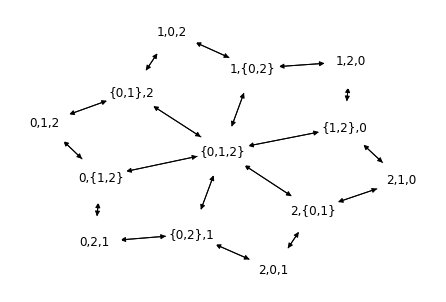

In [40]:
import networkx as nx

ranking_graph = nx.DiGraph()

num_cands = 3
ranking_graph.add_nodes_from([str(wr) for wr in weak_orders[num_cands]])
cmap = {c:c for c in range(num_cands)}
for n1 in ranking_graph.nodes: 
    for n2 in ranking_graph.nodes:
        if n1 != n2:
            add_edge = True
            wr1 = wRanking(cmap, r_str = n1)
            wr2 = wRanking(cmap, r_str = n2)

            for wr in weak_orders[num_cands]: 
                
                if str(wr) != n1 and str(wr) != n2: 
                    if between(wr1,wr,wr2): 
                        add_edge = False
            if add_edge: 
                ranking_graph.add_edge(n1,n2)
    
nx.draw(ranking_graph, pos=nx.spring_layout(ranking_graph), node_size=2700, node_color="white", with_labels=True,  font_size=12)

print(nx.shortest_path_length(ranking_graph, "0,1,2", "2,1,0"))



In [41]:
ranking_graphs = dict()

for num_cands in [3,4]:
    print(num_cands)
    ranking_graph = nx.DiGraph()
    ranking_graph.add_nodes_from([str(wr) for wr in weak_orders[num_cands]])
    cmap = {c:c for c in range(num_cands)}
    for n1 in ranking_graph.nodes: 
        for n2 in ranking_graph.nodes:
            if n1 != n2:
                add_edge = True
                wr1 = wRanking(cmap, r_str = n1)
                wr2 = wRanking(cmap, r_str = n2)

                for wr in weak_orders[num_cands]: 

                    if str(wr) != n1 and str(wr) != n2: 
                        if between(wr1,wr,wr2): 
                            add_edge = False
                if add_edge: 
                    ranking_graph.add_edge(n1,n2)
    ranking_graphs[num_cands]=ranking_graph

3
4


In [42]:
def dp_dist(wr1, wr2):
    
    ranking_graph = ranking_graphs[wr1.num_alts]
    return nx.shortest_path_length(ranking_graph, str(wr1), str(wr2))


In [43]:
true_ranking = (0,1,2,3)
nu = 1.0
theta = 0.0

num_cands = 4
cmap = {c:c for c in range(num_cands)}  
true_rank = wRanking(cmap, r_str=",".join([str(c) for c in true_ranking]))
distances = dict()
for perm in permutations(range(len(true_rank.alts))): 
    r = wRanking(cmap, r_str=",".join([str(c) for c in perm]))
    distances[r] = dp_dist(true_rank, r)
sorted_tuples = sorted(distances.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
max_dist = max(sorted_dict.values())
print(max_dist)
for r in sorted_dict.keys():
    print(f"dist between {str(true_rank)} and {str(r)} is {round(sorted_dict[r] / max_dist, 4)}")

6
dist between 0,1,2,3 and 0,1,2,3 is 0.0
dist between 0,1,2,3 and 0,1,3,2 is 0.3333
dist between 0,1,2,3 and 0,2,1,3 is 0.3333
dist between 0,1,2,3 and 1,0,2,3 is 0.3333
dist between 0,1,2,3 and 0,2,3,1 is 0.6667
dist between 0,1,2,3 and 0,3,1,2 is 0.6667
dist between 0,1,2,3 and 0,3,2,1 is 0.6667
dist between 0,1,2,3 and 1,0,3,2 is 0.6667
dist between 0,1,2,3 and 1,2,0,3 is 0.6667
dist between 0,1,2,3 and 2,0,1,3 is 0.6667
dist between 0,1,2,3 and 2,1,0,3 is 0.6667
dist between 0,1,2,3 and 1,2,3,0 is 1.0
dist between 0,1,2,3 and 1,3,0,2 is 1.0
dist between 0,1,2,3 and 1,3,2,0 is 1.0
dist between 0,1,2,3 and 2,0,3,1 is 1.0
dist between 0,1,2,3 and 2,1,3,0 is 1.0
dist between 0,1,2,3 and 2,3,0,1 is 1.0
dist between 0,1,2,3 and 2,3,1,0 is 1.0
dist between 0,1,2,3 and 3,0,1,2 is 1.0
dist between 0,1,2,3 and 3,0,2,1 is 1.0
dist between 0,1,2,3 and 3,1,0,2 is 1.0
dist between 0,1,2,3 and 3,1,2,0 is 1.0
dist between 0,1,2,3 and 3,2,0,1 is 1.0
dist between 0,1,2,3 and 3,2,1,0 is 1.0


In [44]:
true_ranking = (0,1,2,3)
nu = 1.0
theta = 0.0

num_cands = 4
cmap = {c:c for c in range(num_cands)}  
true_rank = wRanking(cmap, r_str=",".join([str(c) for c in true_ranking]))
distances = dict()
for r in weak_orders[num_cands]: 
    #r = wRanking(cmap, r_str=",".join([str(c) for c in perm]))
    distances[r] = dp_dist(true_rank, r)
sorted_tuples = sorted(distances.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
max_dist = max(sorted_dict.values())
print(max_dist)
for r in sorted_dict.keys():
    print(f"dist between {str(true_rank)} and {str(r)} is {round(sorted_dict[r] / max_dist, 4)}")

6
dist between 0,1,2,3 and 0,1,2,3 is 0.0
dist between 0,1,2,3 and 0,1,{2,3} is 0.1667
dist between 0,1,2,3 and 0,{1,2},3 is 0.1667
dist between 0,1,2,3 and {0,1},2,3 is 0.1667
dist between 0,1,2,3 and 0,1,3,2 is 0.3333
dist between 0,1,2,3 and 0,2,1,3 is 0.3333
dist between 0,1,2,3 and 0,{1,2,3} is 0.3333
dist between 0,1,2,3 and 1,0,2,3 is 0.3333
dist between 0,1,2,3 and {0,1},{2,3} is 0.3333
dist between 0,1,2,3 and {0,1,2},3 is 0.3333
dist between 0,1,2,3 and 0,2,{1,3} is 0.5
dist between 0,1,2,3 and 0,3,{1,2} is 0.5
dist between 0,1,2,3 and 0,{1,3},2 is 0.5
dist between 0,1,2,3 and 0,{2,3},1 is 0.5
dist between 0,1,2,3 and 1,0,{2,3} is 0.5
dist between 0,1,2,3 and 1,{0,2},3 is 0.5
dist between 0,1,2,3 and 2,{0,1},3 is 0.5
dist between 0,1,2,3 and {0,1},3,2 is 0.5
dist between 0,1,2,3 and {0,2},1,3 is 0.5
dist between 0,1,2,3 and {1,2},0,3 is 0.5
dist between 0,1,2,3 and {0,1,2,3} is 0.5
dist between 0,1,2,3 and 0,2,3,1 is 0.6667
dist between 0,1,2,3 and 0,3,1,2 is 0.6667
dist betw

## Weak Ranking Profile

+---+-----+-------+-----+
| 1 |  1  |   1   |  1  |
+---+-----+-------+-----+
| 3 |  0  | 0,1,2 |  2  |
| 0 |  3  |       |  3  |
| 1 | 1,2 |       | 0,1 |
| 2 |     |       |     |
+---+-----+-------+-----+
2.0
2.0
1.0
prf.margin(0,1) 2.0
prf.margin(1,0) -2.0
prf.margin(0,2) 1.0
prf.margin(2,0) -1.0
prf.margin(1,2) 0.0
prf.margin(2,1) 0.0
None


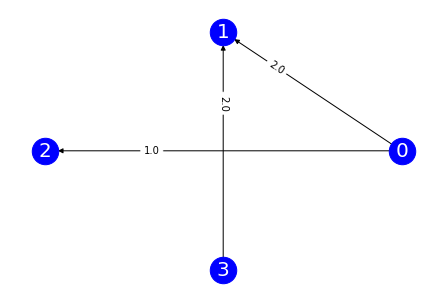

In [45]:
from tabulate  import tabulate
class wProfile(object):
    """
    A profile of strict weak orderings

    """
    def __init__(self, rankings, num_cands, rcounts=None, cmap=None):
        """
        Create a profile
                
        """
        
        self.num_cands = num_cands
        self.cand_nums = range(0, num_cands) 
        
        self._cand_to_cnum = cmap if cmap else {c:c for c in range(num_cands)}
        self._cnum_to_cand = {cnum: c for c,cnum in self._cand_to_cnum.items()}
        
        self._rankings = [wRanking(self._cand_to_cnum, r_str = r_str) for r_str in rankings]
        self._rcounts = rcounts if rcounts is not None else [1] * len(rankings)

        # total number of voters
        self.num_voters = np.sum(self._rcounts)

    @property
    def rankings_counts(self):
        # getter function to get the rankings and rcounts
        return self._rankings, self._rcounts
    
    @property
    def rankings(self): 
        # get the list of rankings
        return [r for ridx,r in enumerate(self._rankings) for n in range(self._rcounts[ridx])]
    
    @property 
    def candidates(self): 
        return sorted(list(self._cand_to_cnum.keys()))
    
    def support(self, c1, c2):
        # the number of voters that rank c1 strictly above c2 
        # wrapper function that calls the compiled _support function

        return sum([rcount if r.P(c1,c2) else 0.0 for r,rcount in zip(self._rankings, self._rcounts)])
    
    def margin(self, c1, c2):
        # the number of voters that rank c1 over c2 minus the number
        #   that rank c2 over c2.
        # wrapper function that calls the compiled _margin function

        return self.support(c1, c2) - self.support(c2, c1)
        
    def majority_prefers(self, c1, c2): 
        # return True if more voters rank c1 over c2 than c2 over c1

        return self.margin(c1, c2) > 0

    def condorcet_winner(self):
        # return the Condorcet winner --- a candidate that is majority preferred to every other candidate
        # if a Condorcet winner doesn't exist, return None
        
        cw = None
        for c in self.candidates: 
            if all([self.majority_prefers(c,c2) for c2 in self.candidates if c != c2]): 
                cw = c
                break # if a Condorcet winner exists, then it is unique
        return cw

    def weak_condorcet_winner(self):
        # return the set of Weak Condorcet winner --- candidate c is a weak Condorcet winner if there 
        # is no other candidate majority preferred to c. Note that unlike with Condorcet winners, there 
        # may be more than one weak Condorcet winner.
        # if a weak Condorcet winner doesn't exist, return None
        
        weak_cw = list()
        for c in self.candidates: 
            if not any([self.majority_prefers(c2,c) for c2 in self.candidates if c != c2]): 
                weak_cw.append(c)
        return sorted(weak_cw) if len(weak_cw) > 0 else None

    def condorcet_loser(self):
        # return the Condorcet loser --- a candidate that is majority preferred by every other candidate
        # if a Condorcet loser doesn't exist, return None
        
        cl = None
        for c in self.candidates: 
            if all([self.majority_prefers(c2,c) for c2 in self.candidates if c != c2]): 
                cl = c
                break # if a Condorcet loser exists, then it is unique
        return cl
    
    def strict_maj_size(self):
        # return the size of  strictly more than 50% of the voters
        
        return int(self.num_voters/2 + 1 if self.num_voters % 2 == 0 else int(ceil(float(self.num_voters)/2)))

    def margin_graph(self, cmap=None): 
        # generate the margin graph (i.e., the weighted majority graph)
    
        mg = nx.DiGraph()
        mg.add_nodes_from(self.candidates)
        mg.add_weighted_edges_from([(c1, c2, self.margin(c1,c2))
                                    for c1 in self.candidates 
                                    for c2 in self.candidates if c1 != c2 if self.majority_prefers(c1, c2)])
        return mg

    
    def display(self, cmap=None, style="pretty"):
        # display a profile
        # style defaults to "pretty" (the PrettyTable formatting)
        # other stype options is "latex" or "fancy_grid" (or any style option for tabulate)
        
        
        possible_ranks = range(1, self.num_cands + 1)
        
        tbl = list()
        
        for r in possible_ranks: 
            tbl.append([",".join(map(str,wr.cands_at_rank(r))) for wr in self._rankings])
        print(tabulate(tbl,
                       self._rcounts, 
                       tablefmt=style))        
        
    def display_margin_graph(self, cmap=None):
        # display the margin graph
        
        # create the margin graph.   The reason not to call the above method margin_graph 
        # is that we may want to apply the cmap to the names of the candidates
        
        
        mg = nx.DiGraph()
        mg.add_nodes_from(self.candidates)
        mg.add_weighted_edges_from([(c1, c2, self.margin(c1,c2))
                                    for c1 in self.candidates 
                                    for c2 in self.candidates if c1 != c2 if self.majority_prefers(c1, c2)])

        pos = nx.circular_layout(mg)
        nx.draw(mg, pos, 
                font_size=20, node_color='blue', font_color='white', node_size=700, 
                width=1, lw=1.5, with_labels=True)
        labels = nx.get_edge_attributes(mg,'weight')
        nx.draw_networkx_edge_labels(mg,pos,edge_labels=labels, label_pos=0.3)
        plt.show()

num_cands = 4
rankings = ["3,0,1,2", "0,3,{1,2}", "{0,1,2}", "2,3,{0,1}"]

prf = wProfile(rankings, num_cands)

prf.display()
print(prf.support(0,1))
print(prf.support(0,2))
print(prf.support(1,2))

print("prf.margin(0,1)", prf.margin(0,1))
print("prf.margin(1,0)", prf.margin(1,0))
print("prf.margin(0,2)", prf.margin(0,2))
print("prf.margin(2,0)", prf.margin(2,0))
print("prf.margin(1,2)", prf.margin(1,2))
print("prf.margin(2,1)", prf.margin(2,1))

print(prf.condorcet_winner())

prf.display_margin_graph()

## Polling Information

Annemieke Reijngoud and Ulle Endriss. [Voter Response to Iterated Poll Information](https://staff.fnwi.uva.nl/u.endriss/pubs/files/ReijngoudEndrissAAMAS2012.pdf). In Proceedings of the 11th International Conference on Autonomous Agents and Multiagent Systems (AAMAS-2012), June 2012. 



In [46]:
class Voter():
    
    def __init__(self, ranking, bias, dist):
        
        self.ranking = ranking
        
        self.bias = bias
        
        self.dist = dist
        
    def update_poll_information(self, top_winners):
        
        '''choose favorite candidate from top_winners and move that candidate to the top of the ranking'''
        
        winner = {c:self.ranking.rank(c) for c in top_winners}
        
        v.ranking.lift(min(winner.items(), key=lambda cr: cr[1])[0], 1)
        
    
cmap = {0:0, 1:1, 2:2, 3:3}
v = Voter(wRanking(cmap, r_str = "0,1,2,3"), None, None)
print(v.ranking)
v.update_poll_information([1,2])

print(v.ranking)

0,1,2,3
1,0,2,3


In [47]:
num_cands = 5
num_voters = 50
all_profiles = list()
while len(all_profiles) < 10000: 
    
    prof = generate_profile(num_cands, num_voters)
    
    if prof.condorcet_winner() is not None: 
        all_profiles.append(prof)

In [48]:
num_cands = 5
num_voters = 50
num_winners_poll = 2

cond_eff = {
    "before_poll": 0,
    "after_poll": 0
}

max_rounds = 100
cmap = {c:c for c in range(num_cands)}

for prof in all_profiles: 
    voters = [Voter(wRanking(cmap, r_str = ",".join(map(str,r))), None, None) for r in  prof.rankings]
    cw = prof.condorcet_winner()
    cond_eff["before_poll"] += int(cw is not None and plurality(prof) == [cw])
    for r in range(max_rounds): 
        
        did_voters_change = list()
        for v in voters: 
            init_ranking = str(v.ranking)
            plurality_scores = prof.plurality_scores()

            top_winners = [cp[0] for cp in sorted(plurality_scores.items(), key=lambda cp: cp[1], reverse=True)[0:num_winners_poll]]
            v.update_poll_information(top_winners)

            did_voters_change.append(init_ranking != str(v.ranking))
            prof = Profile([tuple(map(int,str(_v.ranking).split(","))) for _v in voters], num_cands)
        if not any(did_voters_change):
            break
    cw = prof.condorcet_winner()
    cond_eff["after_poll"] += int(cw is not None and plurality(prof) == [cw])

print("Plurality")
print("No Poll", cond_eff["before_poll"] / len(all_profiles))

print("Poll 2-pragmatist", cond_eff["after_poll"] / len(all_profiles))



Plurality
No Poll 0.592
Poll 2-pragmatist 0.9782


In [49]:
num_cands = 5
num_voters = 50
cond_eff = {
    "before_poll": 0,
    "after_poll": 0
}

max_rounds = 100
num_winners_poll = 3

cmap = {c:c for c in range(num_cands)}

for prof in all_profiles: 
    voters = [Voter(wRanking(cmap, r_str = ",".join(map(str,r))), None, None) for r in  prof.rankings]
    cw = prof.condorcet_winner()
    cond_eff["before_poll"] += int(cw is not None and plurality(prof) == [cw])
    for r in range(max_rounds): 
        
        did_voters_change = list()
        for v in voters: 
            init_ranking = str(v.ranking)
            plurality_scores = prof.plurality_scores()

            top_winners = [cp[0] for cp in sorted(plurality_scores.items(), key=lambda cp: cp[1], reverse=True)[0:num_winners_poll]]
            v.update_poll_information(top_winners)

            did_voters_change.append(init_ranking != str(v.ranking))
            prof = Profile([tuple(map(int,str(_v.ranking).split(","))) for _v in voters], num_cands)
        if not any(did_voters_change):
            break
    cw = prof.condorcet_winner()
    cond_eff["after_poll"] += int(cw is not None and plurality(prof) == [cw])

print("Plurality")
print("No Poll", cond_eff["before_poll"] / len(all_profiles))
print("Poll 3-pragmatist", cond_eff["after_poll"] / len(all_profiles))



Plurality
No Poll 0.592
Poll 3-pragmatist 0.747


In [50]:
num_cands = 5
num_voters = 50
num_winners_poll = 2

cond_eff = {
    "before_poll": 0,
    "after_poll": 0
}

max_rounds = 100
cmap = {c:c for c in range(num_cands)}

for prof in all_profiles: 
    voters = [Voter(wRanking(cmap, r_str = ",".join(map(str,r))), None, None) for r in  prof.rankings]
    cw = prof.condorcet_winner()
    cond_eff["before_poll"] += int(cw is not None and borda(prof) == [cw])
    for r in range(max_rounds): 
        
        did_voters_change = list()
        for v in voters: 
            init_ranking = str(v.ranking)
            borda_scores = prof.borda_scores()

            top_winners = [cp[0] for cp in sorted(borda_scores.items(), 
                                                  key=lambda cp: cp[1], 
                                                  reverse=True)[0:num_winners_poll]]
            v.update_poll_information(top_winners)

            did_voters_change.append(init_ranking != str(v.ranking))
            prof = Profile([tuple(map(int,str(_v.ranking).split(","))) for _v in voters], num_cands)
        if not any(did_voters_change):
            break
    cw = prof.condorcet_winner()
    cond_eff["after_poll"] += int(cw is not None and borda(prof) == [cw])

print("Borda")
print("No Poll", cond_eff["before_poll"] / len(all_profiles))

print("Poll 2-pragmatist", cond_eff["after_poll"] / len(all_profiles))



Borda
No Poll 0.9067
Poll 2-pragmatist 0.9194


In [51]:
num_cands = 5
num_voters = 50
num_winners_poll = 3

cond_eff = {
    "before_poll": 0,
    "after_poll": 0
}

max_rounds = 100
cmap = {c:c for c in range(num_cands)}

for prof in all_profiles: 
    voters = [Voter(wRanking(cmap, r_str = ",".join(map(str,r))), None, None) for r in  prof.rankings]
    cw = prof.condorcet_winner()
    cond_eff["before_poll"] += int(cw is not None and borda(prof) == [cw])
    for r in range(max_rounds): 
        
        did_voters_change = list()
        for v in voters: 
            init_ranking = str(v.ranking)
            borda_scores = prof.borda_scores()

            top_winners = [cp[0] for cp in sorted(borda_scores.items(), 
                                                  key=lambda cp: cp[1], 
                                                  reverse=True)[0:num_winners_poll]]
            v.update_poll_information(top_winners)

            did_voters_change.append(init_ranking != str(v.ranking))
            prof = Profile([tuple(map(int,str(_v.ranking).split(","))) for _v in voters], num_cands)
        if not any(did_voters_change):
            break
    cw = prof.condorcet_winner()
    cond_eff["after_poll"] += int(cw is not None and borda(prof) == [cw])

print("Borda")
print("No Poll", cond_eff["before_poll"] / len(all_profiles))

print("Poll 3-pragmatist", cond_eff["after_poll"] / len(all_profiles))



Borda
No Poll 0.9067
Poll 3-pragmatist 0.9083


## Modeling Deliberation

Soroush Rafiee Rad and Olivier Roy (2021).[Deliberation, Single-Peakedness, and Coherent Aggregation](https://www.cambridge.org/core/journals/american-political-science-review/article/abs/deliberation-singlepeakedness-and-coherent-aggregation/652CCF8DF5B03EF352B4B04AD66D90C0), American Political Science Review, 115, 2, pp. 629 - 648.

In [52]:
class Voter():
    
    def __init__(self, ranking, bias, dist):
        
        self.ranking = ranking
        
        self.bias = bias
        
        self.dist = dist
        
    def update_poll_information(self, top_winners):
        
        '''choose favorite candidate from top_winners and move that candidate to the top of the ranking'''
        
        winner = {c:self.ranking.rank(c) for c in top_winners}
        
        v.ranking.lift(min(winner.items(), key=lambda cr: cr[1])[0], 1)
        
    def update_deliberation(self, other_ranking, only_linear = False):
        
        '''choose favorite candidate from top_winners and move that candidate to the top of the ranking'''
        min_dist = np.inf
        new_rankings = list()
        
        possible_orderings = weak_orders[self.ranking.num_alts] if not only_linear else lin_orders[self.ranking.num_alts]
        for wr in possible_orderings:
            
            dist = math.sqrt(self.bias * self.dist(self.ranking, wr) ** 2 + (1-self.bias) * self.dist(other_ranking, wr) ** 2)
            
            if dist < min_dist: 
                min_dist = dist
                new_rankings = [wr]
            elif dist == min_dist:
                new_rankings.append(wr)
        #print([str(r) for r in new_rankings])
        self.ranking = random.choice(new_rankings)

cmap = {0:0, 1:1, 2:2, 3:3}
v = Voter(wRanking(cmap, r_str = "0,{1,2},3"), 0.5, ks_dist)
print(v.ranking)
v.update_deliberation(wRanking(cmap, r_str="2,1,3,0"))
print(v.ranking)

0,{1,2},3
2,0,1,3


In [53]:
cmap = {0:0, 1:1, 2:2, 3:3}
v = Voter(wRanking(cmap, r_str = "0,1,2,3"), 0.5, ks_dist)
print(v.ranking)
v.update_deliberation(wRanking(cmap, r_str="1,0,2,3"))
print(v.ranking)
print("\n-----\n")
v = Voter(wRanking(cmap, r_str = "0,1,2,3"), 0.5, ks_dist)
print(v.ranking)
v.update_deliberation(wRanking(cmap, r_str="1,0,2,3"), only_linear=True)
print(v.ranking)

0,1,2,3
{0,1},2,3

-----

0,1,2,3
0,1,2,3


+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+
| 2 | 2 | 3 | 3 | 3 | 3 | 3 | 1 | 1 | 1 | 1 |
| 1 | 1 | 2 | 2 | 2 | 2 | 2 | 0 | 0 | 2 | 2 |
| 0 | 0 | 1 | 1 | 1 | 1 | 1 | 2 | 2 | 3 | 0 |
| 3 | 3 | 0 | 0 | 0 | 0 | 0 | 3 | 3 | 0 | 3 |
+---+---+---+---+---+---+---+---+---+---+---+


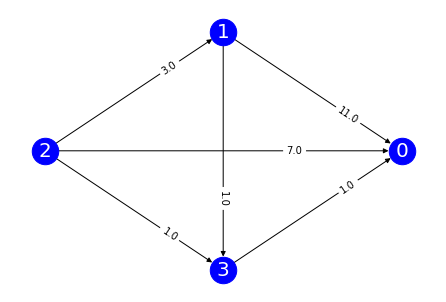

2
+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+
| 2 | 2 | 2 | 2 | 2 | 2 | 2 | 1 | 1 | 2 | 1 |
| 1 | 1 | 3 | 3 | 1 | 3 | 3 | 2 | 2 | 1 | 2 |
| 0 | 0 | 1 | 1 | 3 | 1 | 1 | 0 | 0 | 3 | 0 |
| 3 | 3 | 0 | 0 | 0 | 0 | 0 | 3 | 3 | 0 | 3 |
+---+---+---+---+---+---+---+---+---+---+---+


+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+
| 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 1 | 2 | 1 |
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 2 | 1 | 2 |
| 0 | 0 | 3 | 3 | 3 | 3 | 3 | 0 | 0 | 0 | 0 |
| 3 | 3 | 0 | 0 | 0 | 0 | 0 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+---+---+---+---+---+---+


+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+
| 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 1 | 2 | 2 |
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 2 | 1 | 1 |
| 3 | 0 | 3 | 3 | 3 | 3 | 3 

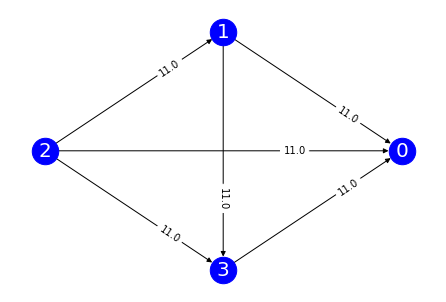

In [54]:
num_rounds = 1

num_voters = 11

num_cands = 4

bias = 0.5
dist = dp_dist
cmap = {c:c for c in range(num_cands)}

lin_prof = generate_profile(num_cands, num_voters, probmod="SinglePeaked")

voters = [Voter(wRanking(cmap, r_str = ",".join(map(str,r))), bias, dp_dist) 
          for r in lin_prof.rankings]


prof = wProfile([str(v.ranking) for v in voters], num_cands)

prof.display()
prof.display_margin_graph()

print(prof.condorcet_winner())
for r in range(num_rounds): 
    
    for v1 in voters: 
        
        for v2 in voters: 
            #print(v2.ranking)
            if v1 != v2: 
                #print("change")
                v2.update_deliberation(v1.ranking, only_linear=True)
                #print(v2.ranking)
                
        prof = wProfile([str(v.ranking) for v in voters], num_cands)
        prof.display()
        print("\n")
print(prof.condorcet_winner())
prof.display_margin_graph()


In [55]:
def has_cycle(mg):
    """true if the margin graph mg has a cycle"""
    try:
        cycles =  nx.find_cycle(mg)
    except:
        cycles = list()
    return len(cycles) != 0


In [56]:
num_trials = 1000

num_voters = 21

num_cands = 3

num_rounds = 1

probmod = "IC"
bias = 0.8
dist = dp_dist
cmap = {c:c for c in range(num_cands)}

cond_winner = {"before_delib": 0, "after_delib": 0, "diff_cond_winner": 0}
cycles = {"before_delib": 0, "after_delib": 0}

for r in tqdm(range(num_trials)): 
    lin_prof = generate_profile(num_cands, num_voters, probmod=probmod)
    

    voters = [Voter(wRanking(cmap, r_str = ",".join(map(str,r))), bias, dp_dist) 
              for r in lin_prof.rankings]


    prof = wProfile([str(v.ranking) for v in voters], num_cands)
    
    cw = prof.condorcet_winner()
    
    cycles["before_delib"] += int(has_cycle(prof.margin_graph()))
    
    cond_winner["before_delib"] += int(cw is not None)
    
    # now, deliberate
    for r in range(num_rounds): 

        for v1 in voters: 

            for v2 in voters: 
                #print(v2.ranking)
                if v1 != v2: 
                    #print("change")
                    v2.update_deliberation(v1.ranking, only_linear=False)
                    #print(v2.ranking)
                    
    prof2 = wProfile([str(v.ranking) for v in voters], num_cands)
    
    cw_after = prof2.condorcet_winner()
    
    cycles["after_delib"] += int(has_cycle(prof2.margin_graph()))
    
    cond_winner["after_delib"] += int(cw_after is not None)
    cond_winner["diff_cond_winner"] += cw != cw_after
            
print(f"Prob profiles with cycles before deliberation: {round(cycles['before_delib'] / num_trials, 3)}")
print(f"Prob profiles with cycles after deliberation: {round(cycles['after_delib'] / num_trials, 3)}")
print(f"\n")
print(f"Prob profiles with Condorcet winner before deliberation: {round(cond_winner['before_delib'] / num_trials, 3)}")
print(f"Prob profiles with Condorcet winner after deliberation: {round(cond_winner['after_delib'] / num_trials, 3)}")
print(f"Prob profiles with different Condorcet winner after deliberation: {round(cond_winner['diff_cond_winner'] / num_trials, 3)}")



Prob profiles with cycles before deliberation: 0.078
Prob profiles with cycles after deliberation: 0.0


Prob profiles with Condorcet winner before deliberation: 0.922
Prob profiles with Condorcet winner after deliberation: 0.935
Prob profiles with different Condorcet winner after deliberation: 0.493


In [57]:
num_trials = 1000

num_voters = 21

num_cands = 4

num_rounds = 1

probmod = "SinglePeaked"
bias = 0.8
dist = ks_dist
cmap = {c:c for c in range(num_cands)}

cond_winner = {"before_delib": 0, "after_delib": 0, "diff_cond_winner": 0}
cycles = {"before_delib": 0, "after_delib": 0}

for r in tqdm(range(num_trials)): 
    lin_prof = generate_profile(num_cands, num_voters, probmod=probmod)
    

    voters = [Voter(wRanking(cmap, r_str = ",".join(map(str,r))), bias, dp_dist) 
              for r in lin_prof.rankings]


    prof = wProfile([str(v.ranking) for v in voters], num_cands)
    
    cw = prof.condorcet_winner()
    
    cycles["before_delib"] += int(has_cycle(prof.margin_graph()))
    
    cond_winner["before_delib"] += int(cw is not None)
    
    # now, deliberate
    for r in range(num_rounds): 

        for v1 in voters: 

            for v2 in voters: 
                #print(v2.ranking)
                if v1 != v2: 
                    #print("change")
                    v2.update_deliberation(v1.ranking, only_linear=False)
                    #print(v2.ranking)
                    
    prof2 = wProfile([str(v.ranking) for v in voters], num_cands)
    
    cw_after = prof2.condorcet_winner()
    
    cycles["after_delib"] += int(has_cycle(prof2.margin_graph()))
    
    cond_winner["after_delib"] += int(cw_after is not None)
    cond_winner["diff_cond_winner"] += cw != cw_after
            
print(f"Prob profiles with cycles before deliberation: {round(cycles['before_delib'] / num_trials, 3)}")
print(f"Prob profiles with cycles after deliberation: {round(cycles['after_delib'] / num_trials, 3)}")
print(f"\n")
print(f"Prob profiles with Condorcet winner before deliberation: {round(cond_winner['before_delib'] / num_trials, 3)}")
print(f"Prob profiles with Condorcet winner after deliberation: {round(cond_winner['after_delib'] / num_trials, 3)}")
print(f"Prob profiles with different Condorcet winner after deliberation: {round(cond_winner['diff_cond_winner'] / num_trials, 3)}")

    


Prob profiles with cycles before deliberation: 0.0
Prob profiles with cycles after deliberation: 0.0


Prob profiles with Condorcet winner before deliberation: 1.0
Prob profiles with Condorcet winner after deliberation: 0.938
Prob profiles with different Condorcet winner after deliberation: 0.45
